<a href="https://colab.research.google.com/github/Robin-Rego/Bike-Sharing-Demand-Prediction/blob/main/Robin_Rego_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Collecting**

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Classification ML-  Corona virus tweet sentiment analysis/Coronavirus Tweets.csv", encoding='ISO-8859-1')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df.shape

(41157, 6)

From this we come to know that the shape of Dataset is 41157 Rows and 6 Columns

#**Data Analyzing**

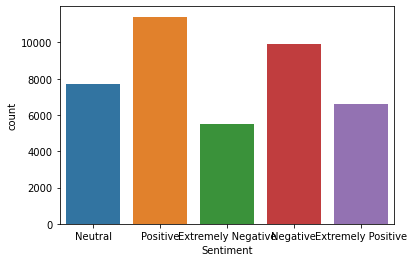

In [ ]:
sns.countplot(x = 'Sentiment', data = df)

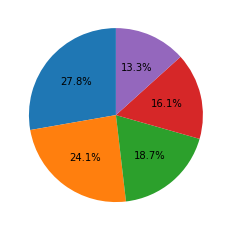

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(df['Sentiment'].value_counts(), autopct='%1.1f%%',shadow=False,startangle=90)
plt.show()

In [ ]:
# Let's get dummy variables of TweetAt
unique_TweetAt = df['TweetAt'].unique()
unique_TweetAt

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [ ]:
#df = pd.concat([df, unique_TweetAt], axis = 1)

In [ ]:
# Checking the relationship between the Sentiment and unique_TweetAt columns
#sns.countplot(x = 'Sentiment', hue = 'unique_TweetAt', data = df)

In [ ]:
# Let's check the highest number of tweets coming from which location
df['Location'].value_counts().head()

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
Name: Location, dtype: int64

London is the place from where the Tweets are highest.

In [ ]:
# Similarly, let's check for Date vs Tweets
df['TweetAt'].value_counts().head()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
Name: TweetAt, dtype: int64

Date (20-03-2020) is where the Tweets are highest.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe(include = 'all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


#**Data Wrangling**

In [ ]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

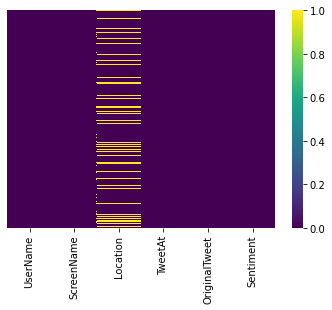

In [ ]:
# Let's plot a heatmap to check the Nan values
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

In [ ]:
df["Location"].fillna(df['Location'].mode().iloc[0],inplace=True)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Let's check if there are any null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       41157 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

No null values are there in the Dataset

In [ ]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

In [ ]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,London,9130
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


In [ ]:
count_of_tweets = list(df['TweetAt'].value_counts())
date_of_tweets = list(df['TweetAt'].unique())
date_df = pd.DataFrame(list(zip(date_of_tweets,count_of_tweets)),columns=['Date','Count of Tweets'])
date_df.sort_values(by=['Count of Tweets'],ascending=False).head(10)

,Date,Count of Tweets
0,16-03-2020,3448
1,17-03-2020,3215
2,18-03-2020,2979
3,19-03-2020,2742
4,20-03-2020,2653
5,21-03-2020,2114
6,22-03-2020,2062
7,23-03-2020,1977
8,24-03-2020,1881
9,25-03-2020,1843


#**Data PreProcessing**

In [ ]:
#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
"""
# STAGE 1: Let's convert all the text in the 'OriginalTweet' column to lower case
clean_text_1 = []
def to_lower_case(data):
  for words in  df['OriginalTweet']:
    clean_text_1.append(str.lower(words))
    """

"\n# STAGE 1: Let's convert all the text in the 'OriginalTweet' column to lower case\nclean_text_1 = []\ndef to_lower_case(data):\n  for words in  df['OriginalTweet']:\n    clean_text_1.append(str.lower(words))\n    "

In [ ]:
#print(to_lower_case('OriginalTweet'))

In [ ]:
"""
# Let's remove semicolons, paranthesis, special characters and symbols 
import re
for i in df["OriginalTweet"]:
  clean_text_2 = []
  res = re.sub(r'[^\s]',"", i)
  if res!="":
    clean_text_2.append(res)
df = pd.concat([df, pd.DataFrame(clean_text_2, columns=["CleanedTweet"])], axis=1, sort=False)
"""

'for i in df["OriginalTweet"]:\n  clean_text_2 = []\n  res = re.sub(r\'[^\\s]\',"", i)\n  if res!="":\n    clean_text_2.append(res)\ndf = pd.concat([df, pd.DataFrame(clean_text_2, columns=["CleanedTweet"])], axis=1, sort=False)\n'

In [ ]:
"""test = "@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8"
res = re.sub(r'("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")',"", test)"""

In [ ]:
"""
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
tweet = []
for i in df["OriginalTweet"]:
  tweet.append(reg.sub(" ", i))
df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)
"""

In [42]:
import re
nltk.download('stopwords')
updated_Original_Tweet = []
#review = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)")
for i in range(len(df['OriginalTweet'])):
  review = re.sub('(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z t])|(w+://S+)',' ',df['OriginalTweet'][i])
  review.lower()
  review.split()
  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  updated_Original_Tweet.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df = pd.concat([df, pd.DataFrame(updated_Original_Tweet, columns = ["updated_Original_Tweet"])], axis = 1, sort = False)

In [44]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,updated_Original_Tweet,updated_Original_Tweet,updated_Original_Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,M e N r b e P h l G h n C h r v ...,M e N r b e P h l G h n C h r v ...,G h n h p c F z 9 F A ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,v c e T l k u r n e g h b u r f l ...,v c e T l k u r n e g h b u r f l ...,v c e T l k u r n e g h b u r f l ...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,C r n v r u A u r l W l w r h g v e ...,C r n v r u A u r l W l w r h g v e ...,C r n v r u A u r l W l w r h g v e ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,M f c k n h e n l n e w h c h ...,M f c k n h e n l n e w h c h ...,M f c k n h e n l n e w h c h ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,M e r e g u p e r r k e u r n g ...,M e r e g u p e r r k e u r n g ...,M e r e g u p e r r k e u r n g ...


In [47]:
# Creating Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['updated_Original_Tweet']).toarray()

In [49]:
# Creating TD-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
Y = tv.fit_transform(df['updated_Original_Tweet']).toarray()

In [55]:
# Let's get the dummy values for Sentiment column
y = pd.get_dummies(df['Sentiment'])
y 

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
41152,0,0,0,1,0
41153,1,0,0,0,0
41154,0,0,0,0,1
41155,0,0,0,1,0


In [56]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

ValueError: ignored

In [ ]:
# Training model using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB


#**Note:** If we check the dataset there are a lot of "String values". Therefore, this string value has to be converted into "Dummy Variables" in order to implement "Logistic Regression".

In [ ]:
"""
Listing down the columns which are String values.
A. Location
B. Sentiment

NOTE: We can delete Original Tweet Column
"""
locations = pd.get_dummies(df['Location'])
locations

,,Texas,170825 ? shinee ? svt ? vixx,UK to Detroit Worldwide,VA - TX - ??- Belgium??,#Australia #Oceania,#LeafsNation ??,#Newyork USA #America,+254 (Kenya),"2105 Bridge City, Texas 77611",...,"ÃT: 51.4761159,-2.5612165","ÃT: 51.512407,-0.136951","ÃT: 51.560275,-0.00859","ÃT: 51.56353,-0.08759","ÃT: 53.839856,-0.436773","ÃT: 54.975455,-1.595362","ÃT: 59.19408,17.620422",Ã l'Ã©chelle mondiale,Ã­ ?Ã­?? Ã­? ? ????? ?????? ?????,Ã¯? ???????'? ?????????
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
